In [8]:
import csv
import pandas as pd
import numpy as np

df = pd.read_csv('Students_Social_Media_Addiction.csv')
print(df.head())
print(df.info())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [ ]:
print(df.info())

In [ ]:
#Print Most_Used_Platform
print(df['Most_Used_Platform'].value_counts())

In [ ]:
#checking for missing values
print(df.isnull().sum())
print(df.describe(include='all'))

In [10]:
print(df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']].describe())
print(df['Most_Used_Platform'].value_counts())
print(df['Academic_Level'].value_counts(normalize=True))
# Assuming 'High_Addiction' should be based on 'Addicted_Score' (e.g., high if score > threshold)
df['High_Addiction'] = df['Addicted_Score'] > 7  # Adjust threshold as needed
print("Addiction Distribution:\n", pd.crosstab(df['High_Addiction'], df['Gender'], normalize='index'))

       Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
count             705.000000             705.000000           705.000000   
mean                4.918723               6.868936             6.226950   
std                 1.257395               1.126848             1.105055   
min                 1.500000               3.800000             4.000000   
25%                 4.100000               6.000000             5.000000   
50%                 4.800000               6.900000             6.000000   
75%                 5.800000               7.700000             7.000000   
max                 8.500000               9.600000             9.000000   

       Addicted_Score  
count      705.000000  
mean         6.436879  
std          1.587165  
min          2.000000  
25%          5.000000  
50%          7.000000  
75%          8.000000  
max          9.000000  
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter     

Matplotlib is building the font cache; this may take a moment.


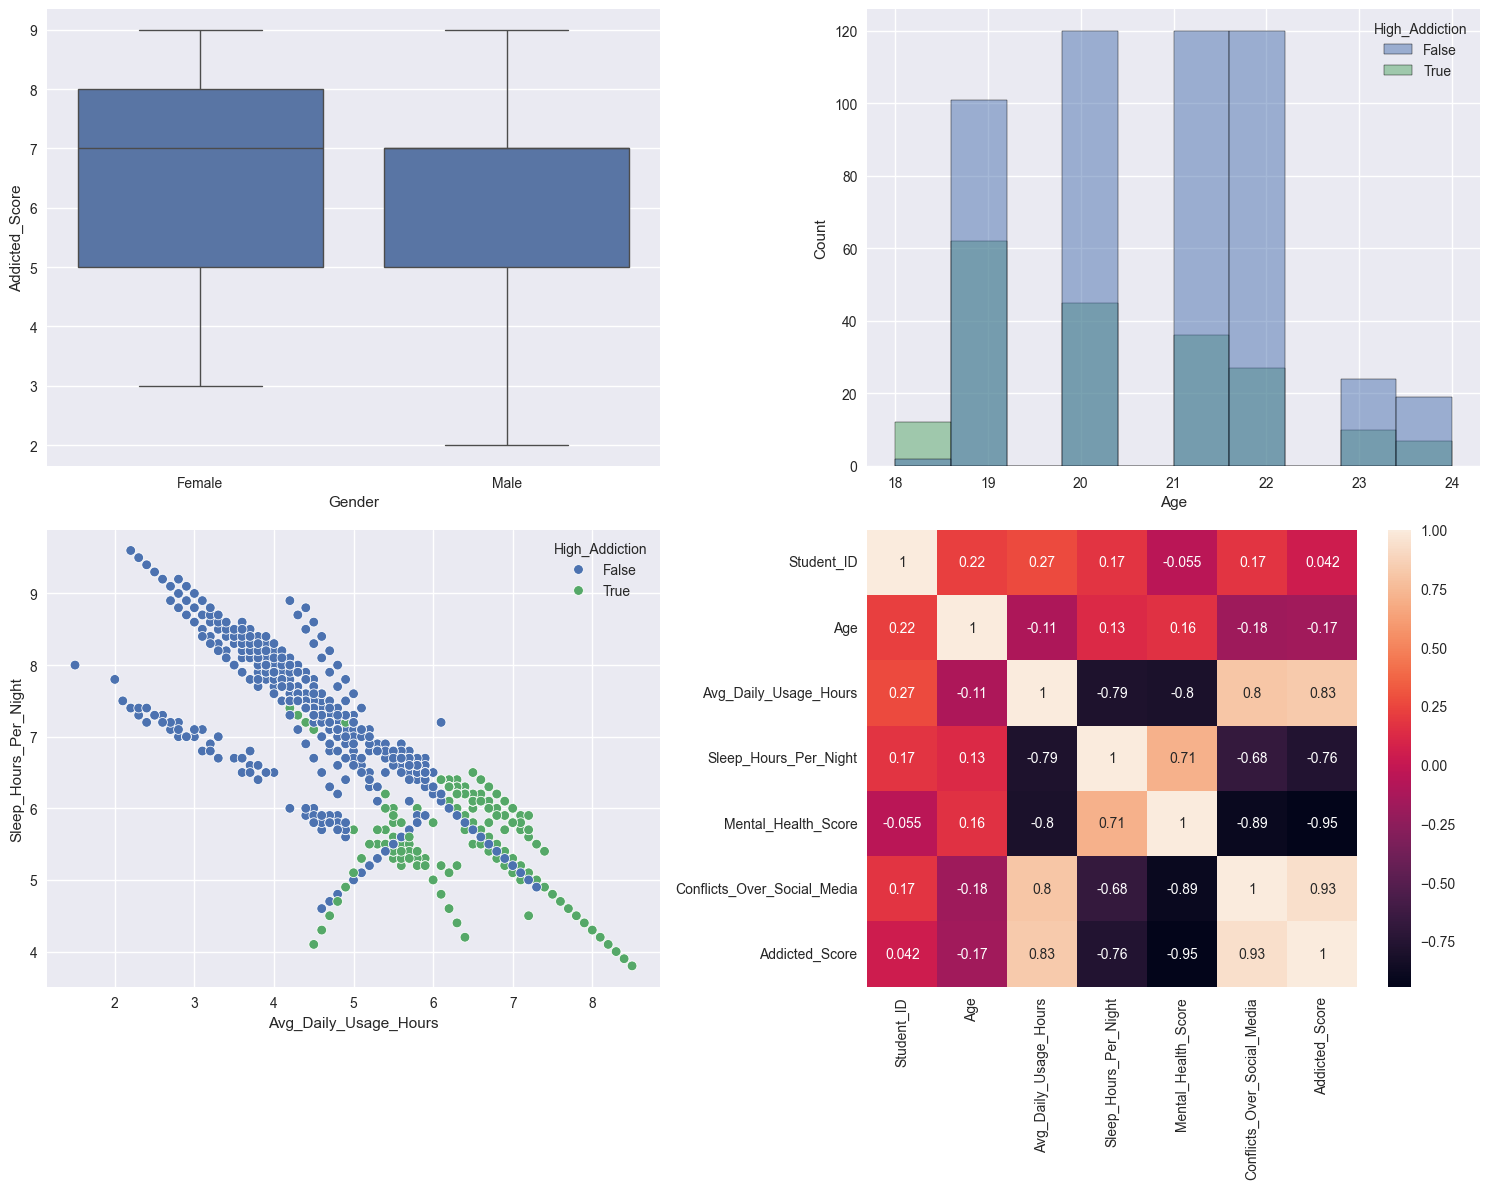

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15,12))

# 1. Addiction by Gender/Age
sns.boxplot(data=df, x='Gender', y='Addicted_Score', ax=axes[0,0])
sns.histplot(data=df, x='Age', hue='High_Addiction', ax=axes[0,1], bins=10)

# 2. Usage vs Sleep/Mental Health
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', hue='High_Addiction', ax=axes[1,0])
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, ax=axes[1,1])

plt.tight_layout()
plt.savefig('eda_plots.png', dpi=300)  # For report
plt.show()
